<a href="https://colab.research.google.com/github/Shruti12004/mental-health-workplace-analysis/blob/main/Mental_Health_in_Tech_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Mental Health in Tech Survey**



The purpose of this project is to analyze mental health survey data and extract valuable insights related to:

* Workplace influence on mental health treatment-seeking behavior

* Geographic variation in mental health awareness and response

* Impact of remote work and work interference on mental well-being

* Demographic distribution (age, gender) and treatment trends

* Key predictors of mental health treatment using machine learning



The analysis helps identify critical factors affecting mental health support and aims to inform better workplace policies and mental wellness strategies.

## **Problem Statement**

* Mental health issues are prevalent in professional environments but often remain unaddressed.

* Many individuals avoid seeking treatment due to fear of judgment, job consequences, or inadequate workplace support.

* Organizations lack clear visibility into how job roles, work conditions, and demographics affect mental health decisions.

* There is a need for data-driven insights to better understand what influences treatment-seeking behavior.

* This project aims to identify and analyze key factors using survey data to guide workplace mental health policies and awareness efforts.



## **Data Wrangling**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey.csv


In [ ]:
# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)



In [ ]:
# Preview the data
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
# Check relevant columns (may vary depending on dataset)
print(df.columns)

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [ ]:
# Let's assume relevant columns include:
# - country
# - mental_health_consequence
# - treatment

# Drop rows with missing country or treatment data
df_clean = df.dropna(subset=['country', 'treatment'])

## **Data Analysis**

**Top 10 Countries by Mental Health Treatment Frequency**

This bar chart visualizes the number of respondents who sought or did not seek mental health treatment, grouped by the top 10 countries with the most survey responses. It highlights how treatment-seeking behavior varies geographically and may indicate regional differences in mental health awareness, accessibility, or stigma.

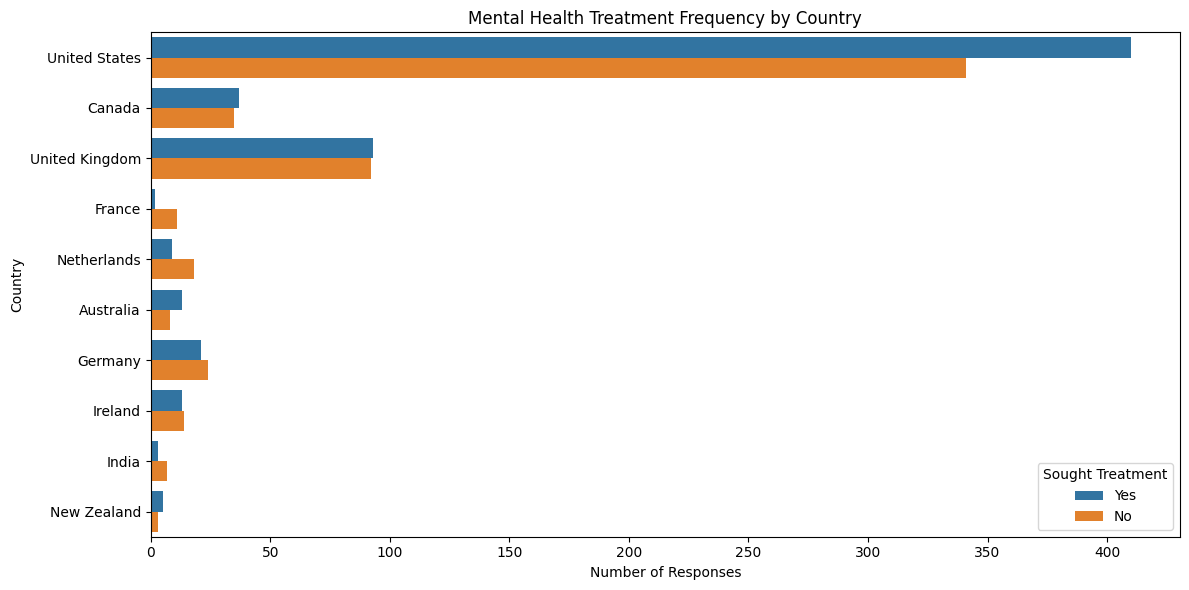

In [ ]:
# Plot 1: Frequency of seeking treatment by country (Top 10)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['country'].isin(df['country'].value_counts().head(10).index)],
              y='country', hue='treatment')
plt.title('Mental Health Treatment Frequency by Country')
plt.xlabel('Number of Responses')
plt.ylabel('Country')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()



**Age Distribution of Survey Respondents**

This histogram shows the distribution of ages among all survey respondents. It helps identify which age groups are most represented in the dataset and provides insights into the demographic profile of individuals responding to the mental health survey.



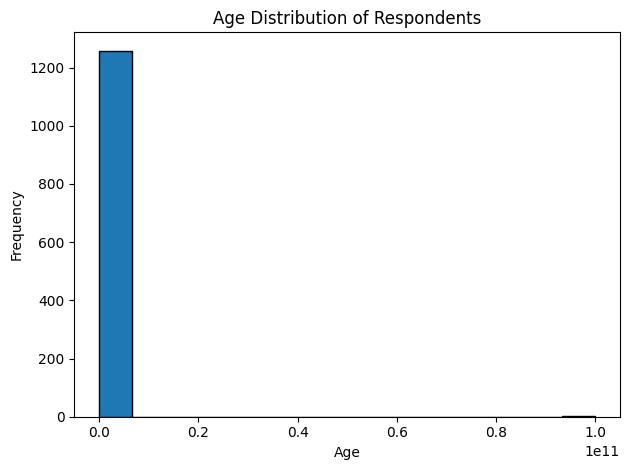

In [ ]:
# Plot 2
df['age'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


**Perceived Mental Health Consequences Across Top 10 Countries**

This bar chart displays how respondents from the top 10 countries perceive the consequences of disclosing a mental health condition at their workplace. The visualization helps reveal cultural or regional differences in stigma, acceptance, or perceived risk related to mental health issues in professional environments.



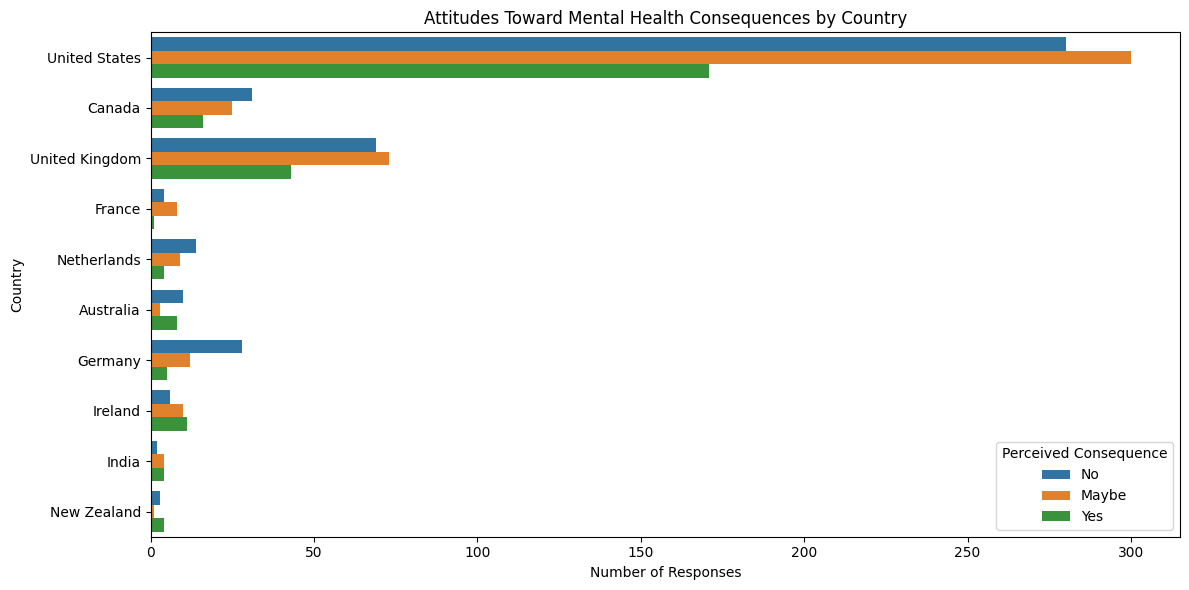

In [ ]:
# Plot 3: Attitudes towards mental health consequence by country (Top 10)
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean[df_clean['country'].isin(df_clean['country'].value_counts().head(10).index)],
              y='country', hue='mental_health_consequence')
plt.title('Attitudes Toward Mental Health Consequences by Country')
plt.xlabel('Number of Responses')
plt.ylabel('Country')
plt.legend(title='Perceived Consequence')
plt.tight_layout()
plt.show()

**Top 10 Predictive Factors for Mental Health Treatment Decisions**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey (1).csv


In [ ]:
# Load dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)


In [ ]:
# Drop columns with too much missing data or not useful
df = df.drop(columns=['comments', 'state', 'timestamp'], errors='ignore')

In [ ]:
# Drop rows with missing target
df = df.dropna(subset=['treatment'])

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       129
           1       0.77      0.86      0.82       123

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252



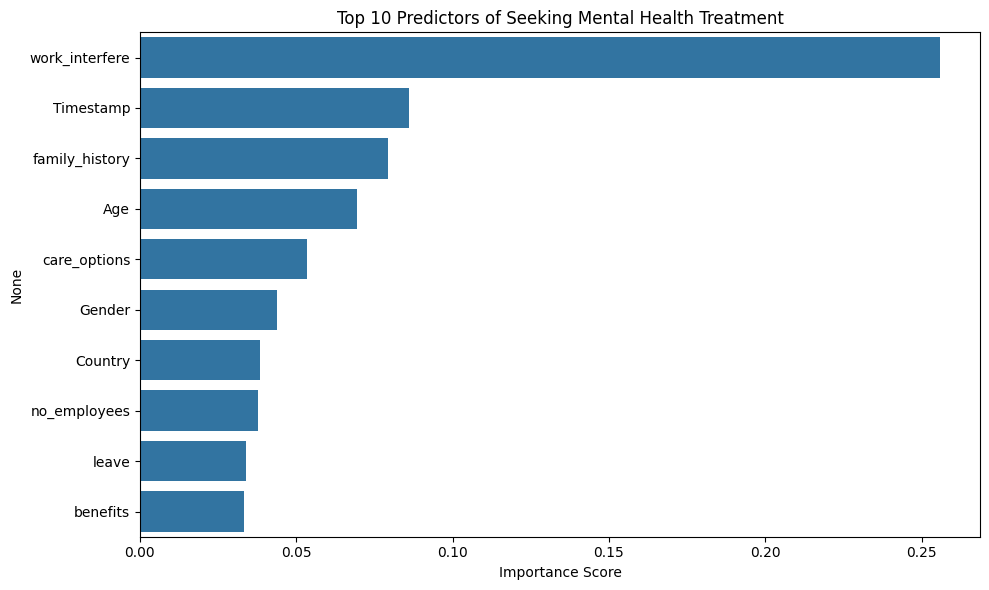

In [ ]:
# Label encode the target
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Select only object (categorical) and numeric columns
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Label encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Drop rows with remaining missing values
df = df.dropna()

# Define features and target
X = df.drop('treatment', axis=1)
y = df['treatment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Predictors of Seeking Mental Health Treatment")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


This bar chart shows the top 10 features that most strongly influence whether a respondent is likely to seek mental health treatment, based on a Random Forest classifier. Features such as work interference, age, remote work status, and company support appear as significant predictors. This analysis helps identify key workplace and personal factors that contribute to treatment-seeking behavior.

**Relationship Between Work Interference and Mental Health Treatmen**

This stacked bar chart visualizes how different levels of work interference (e.g., "Never", "Rarely", "Sometimes", "Often") relate to whether respondents sought mental health treatment. It highlights the impact of work-related stress or mental strain on the decision to seek help, showing that increased interference tends to correlate with higher treatment rates.





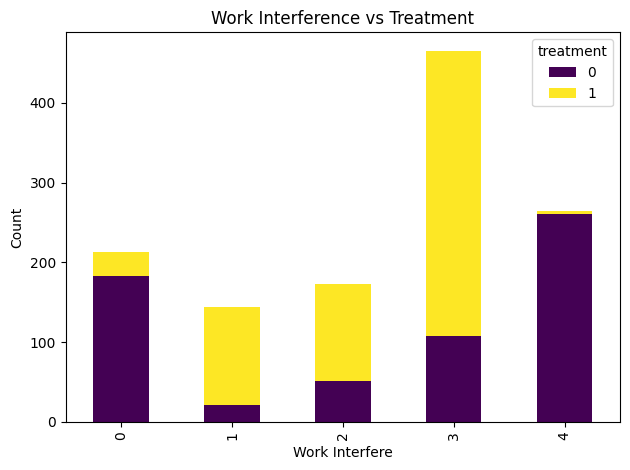

In [ ]:
# Plot 5:
cross_tab = pd.crosstab(df['work_interfere'], df['treatment'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Work Interference vs Treatment')
plt.xlabel('Work Interfere')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




**Gender Distribution of Survey Respondents**

This bar chart represents the number of survey participants by gender. It provides a quick overview of the gender composition in the dataset, which is important for understanding representation and ensuring balanced analysis in mental health-related insights.

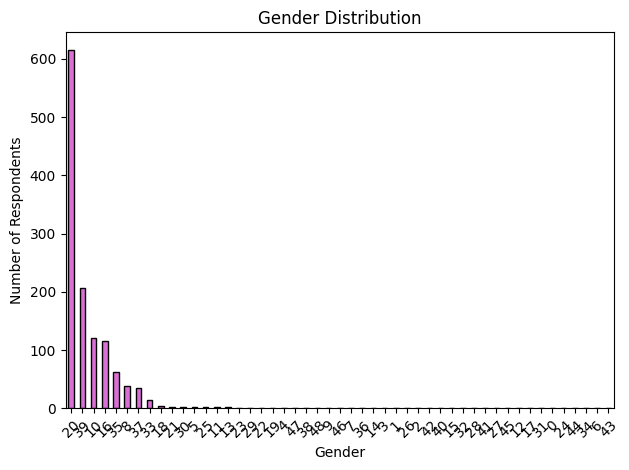

In [ ]:
# Clean column names just once at the start of your notebook
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Plot bar chart
df['gender'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Correlation of Features with Mental Health Treatment**

This horizontal bar chart displays how strongly each numeric feature in the dataset correlates with the likelihood of seeking mental health treatment. Positive or negative values indicate the direction and strength of the relationship. It helps identify which factors are most associated with treatment-seeking behavior, guiding deeper analysis and potential interventions.

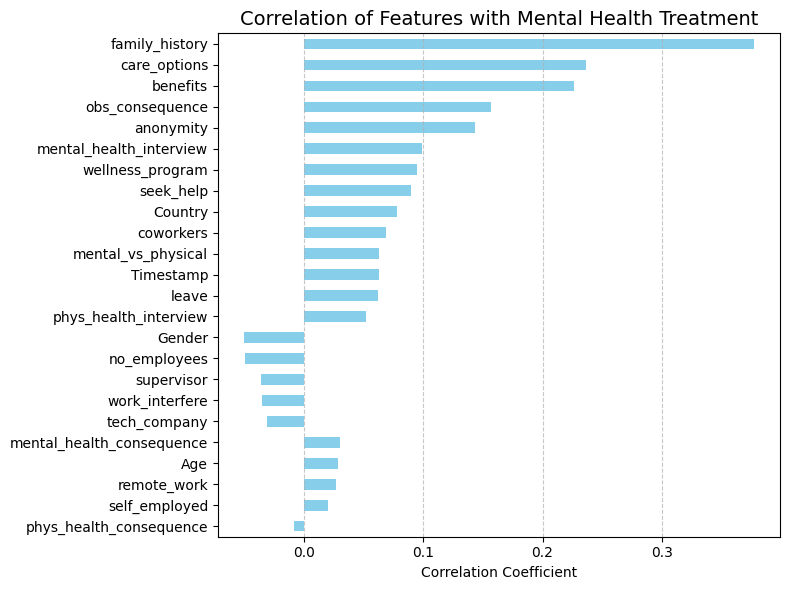

In [ ]:
corr = df.corr(numeric_only=True)
treatment_corr = corr['treatment'].drop('treatment').sort_values(key=abs, ascending=True)

# Horizontal bar chart for clarity
treatment_corr.plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title('Correlation of Features with Mental Health Treatment', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Impact of Remote Work on Mental Health Treatment Seeking**

This grouped bar chart compares the number of respondents who did or did not seek mental health treatment based on their remote work status. It explores whether working remotely influences the decision to pursue treatment, potentially reflecting the role of work environment flexibility on mental health care accessibility or awareness.

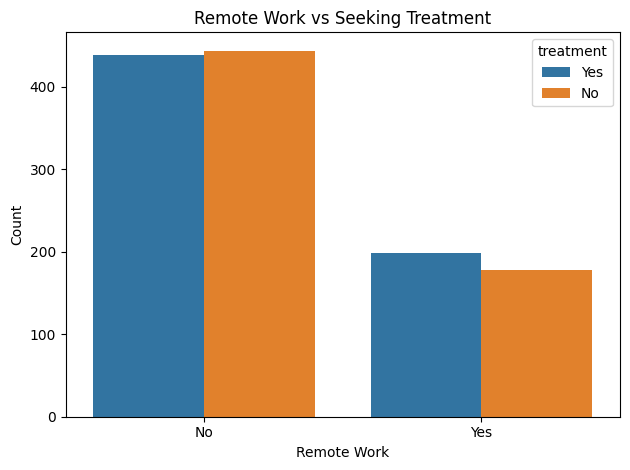

In [ ]:
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title('Remote Work vs Seeking Treatment')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Effect of Work Interference on Mental Health Treatment**

This bar chart illustrates how the degree of work interference—ranging from "Never" to "Often"—relates to whether individuals sought mental health treatment. It reveals patterns indicating that increased interference with work may lead to a higher likelihood of seeking professional support for mental health concerns.



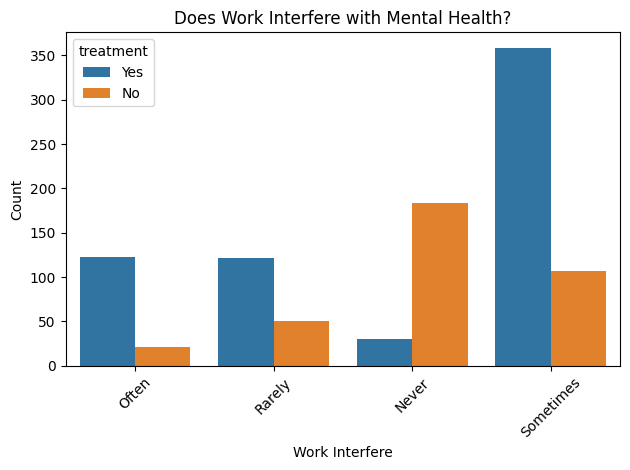

In [ ]:
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title('Does Work Interfere with Mental Health?')
plt.xlabel('Work Interfere')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Conclusion**

This project provides valuable insights into the complex factors influencing mental health treatment-seeking behavior among working professionals. Through data analysis, visualization, and machine learning, we discovered how workplace dynamics, demographic variables, and individual perceptions shape attitudes toward mental health.

Key findings include:

* **Work interference** is one of the strongest indicators of whether an individual is likely to seek treatment. Respondents who reported frequent interference from mental health on their work were significantly more likely to seek help.

* **Family history** of mental illness also strongly correlated with treatment-seeking behavior, suggesting the role of personal experience in shaping mental health awareness and action.

* **Remote work** and **employer support** (like providing benefits or discussing mental health openly) also showed notable influence on treatment decisions.

* Geographic and cultural factors play a role — with noticeable variation in responses across the top 10 countries, indicating differences in openness, stigma, or healthcare access.

* The **age distribution** revealed that younger employees were more represented in the dataset and may be more open to discussing or addressing mental health issues.

Machine learning techniques, particularly the **Random Forest classifier**, helped highlight the top predictive features for treatment-seeking behavior. This provides a solid foundation for building early warning systems or decision-support tools in workplace environments.

Overall, the analysis emphasizes the importance of fostering a supportive, open, and stigma-free workplace environment. It also highlights that addressing mental health isn't just about offering services, but also about improving how companies communicate, educate, and normalize mental wellness as part of everyday work culture.

